### **Perceptron Trick**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

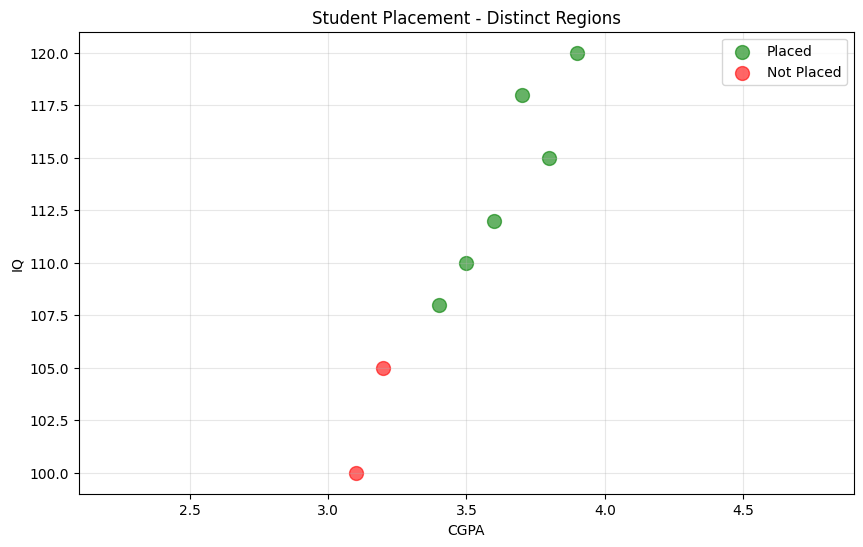

In [5]:
# Create sample data
cgpa = np.array([3.5, 3.8, 3.2, 3.9, 3.1, 3.6, 3.4, 3.7])
iq = np.array([110, 115, 105, 120, 100, 112, 108, 118])
placement = np.array([1, 1, 0, 1, 0, 1, 1, 1])

# Create a dataframe with the data
df = pd.DataFrame({
    'cgpa': cgpa,
    'iq': iq,
    'placement': placement
})

# Separate data by placement status
placed_cgpa = df[df['placement'] == 1]['cgpa']
placed_iq = df[df['placement'] == 1]['iq']
not_placed_cgpa = df[df['placement'] == 0]['cgpa']
not_placed_iq = df[df['placement'] == 0]['iq']

# Create scatter plot with decision boundary regions
plt.figure(figsize=(10, 6))
plt.scatter(placed_cgpa, placed_iq, label='Placed', color='green', s=100, alpha=0.6)
plt.scatter(not_placed_cgpa, not_placed_iq, label='Not Placed', color='red', s=100, alpha=0.6)

# Create a mesh to show decision regions
x_min, x_max = cgpa.min() - 1, cgpa.max() + 1
y_min, y_max = iq.min() - 1, iq.max() + 1

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Student Placement - Distinct Regions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


- The above data set is linearly spearable
- Thus for the classification we need to create a linear line with the line $ AX+BY+C =0$ is 
- Here thus we need to find the value of the A,B,C which will be the perfect fit for the two classes in the dataset.
- Perceptron is the simple idea.
- We start with the random value of A,B,C which will perfrom bad.
- To get the best fit from that line
- Perceptron tricks tells us to perfrom in loop
    - We select the random point of the dataset
    - Then try to see if the line is classifying the point incorrectly 
    - Then the point will shift the line towards and opposite to it so it will be properly calssified.
- The postive and the negetive regions are classified as:
    - $AX+BY+C>0$  is postive region
    - else negetive region
- The shift is done as
    - The change in c causes linear shift, A causes the slope change, change in B caues the rotation along y axis
- **Perceptron trick**:
    - we add the 1 at end of the point
    - The the points in subtacted with the line coefficinets
    - Then we obtain the new line and shift the line to the oppostie region of the point from where it was previously for moving the line to the postive regiopnm
    - When we need to move the region to the negetive region we do the addition i.e moving towards negetive region.
    - we use the learning rate as we take the point then multiply learning rate then do subtraction  with the coefficients.

### **CODE DEMO**

In [22]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1,n_classes=2,hypercube=False,class_sep=10, random_state=41)

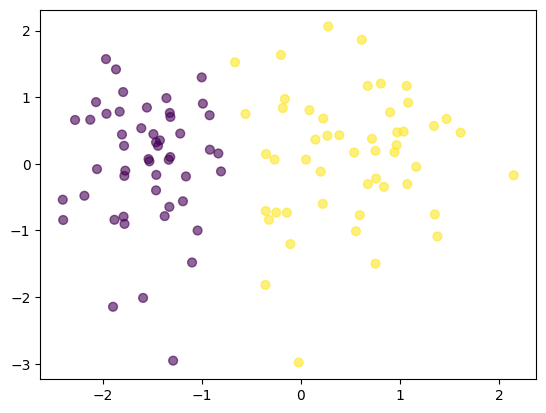

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=40, alpha=0.6)

In [30]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)#adding 1 at the end of each values
    weights=np.ones(X.shape[1])#initalizing weights
    lr=0.1#setting the learning rate to 0.1
    for i in range(1000):
        j=np.random.randint(0,100)
        y_hat=step(np.dot(X[j],weights))
        weights=weights+lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

In [31]:
def step(z):
    return 1 if z>0 else 0

In [32]:
intercept,coef=perceptron(X,y)

In [33]:
intercept,coef

(np.float64(0.9), array([1.3963416 , 0.16283134]))

In [34]:
m=-(coef[0]/coef[1])
c=-intercept/coef[1]

(-3.0, 3.0)

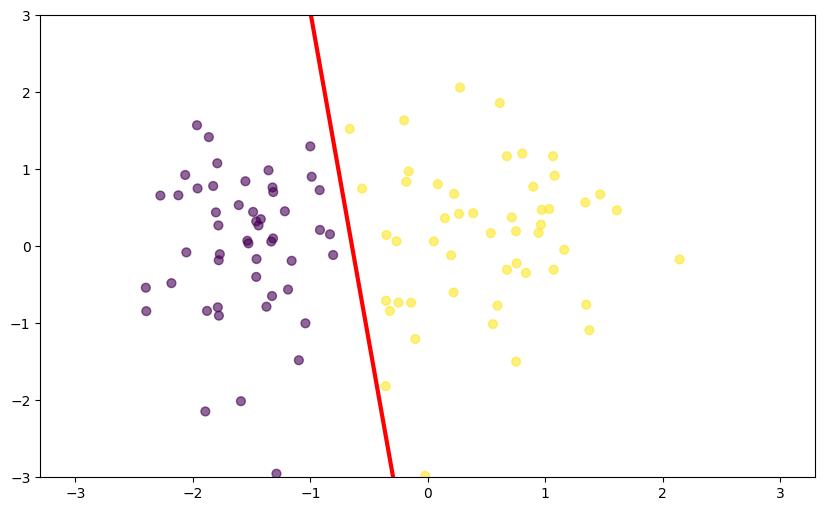

In [36]:
#plotting
x_input=np.linspace(-3,3,100)
y_input=m*x_input+c
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=40, alpha=0.6)
plt.ylim(-3,3)